<a href="https://colab.research.google.com/github/royam0820/Python/blob/main/Python_Session_4_Etudiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camp d'Aventure Python : Session 4 - Plonger dans l’IA !

Bienvenue à la quatrième session de notre camp Python ! Aujourd’hui, on va explorer l’Intelligence Artificielle (IA) en créant des projets super amusants : un classificateur d’images, un chatbot, et une calculatrice magique. Prépare-toi à coder comme un génie de l’IA ! 🚀

---

## Ce qu’on va apprendre aujourd’hui

Créer un classificateur d’images avec Teachable Machine

Construire un chatbot qui parle avec toi

Fabriquer une calculatrice magique

Découvrir comment l’IA fonctionne dans la vraie vie

---

## 1. Petit Rappel

Dans la session précédente, on a appris :

Organiser des données avec des listes et des dictionnaires

Ce qu’est l’IA et comment elle utilise des données

Tester un modèle d’IA pour reconnaître des chiffres

Aujourd’hui, on va mettre tout ça en pratique avec des projets d’IA !

---

## 2. Projet 1 : Classificateur d’Images avec Teachable Machine

C’est quoi Teachable Machine ?

Teachable Machine est un outil en ligne de Google qui te permet de créer des modèles d’IA sans coder. Tu peux entraîner un modèle à reconnaître des images, des sons, ou des poses en lui montrant des exemples.

**Activité : Créer un classificateur Chats vs Chiens**

On va créer un modèle qui reconnaît si une image montre un chat ou un chien.

Étapes (à faire sur Teachable Machine) :

- Va sur [Teachable Machine](https://teachablemachine.withgoogle.com/) et clique sur “Commencer”.

- Choisis “Projet Image”.

- Crée deux classes : “Chiens” et “Chats”.

- Ajoute au moins 10 images pour chaque classe (utilise ta webcam ou télécharge des images en ligne).

- Clique sur “Entraîner le modèle”.

- Teste ton modèle avec ta webcam ou des images pour voir s’il reconnaît bien les chats et les chiens.


### Étape 1 : Exporter le modèle

- Dans Teachable Machine, clique sur “Exporter le modèle”.

- Choisis “TensorFlow” > “Keras” et télécharge le fichier zip (il contient keras_model.h5 et labels.txt).

- Remonter ce fichier zippé dans Google Colab et procéder à l'étape suivante.

### Étape 2 : Utiliser le modèle dans Colab


---

### Utilisation du modèle Keras et Test du modèle avec Python

#### Décompression du fichier converted_keras.zip

In [1]:
# Décompression du fichier /content/converted_keras.zip
# Remplacez 'your_file.zip' par le nom de votre fichier zip.
!unzip converted_keras.zip

# Si vous souhaitez extraire les fichiers dans un répertoire spécifique, vous pouvez utiliser l'option -d
# !unzip your_file.zip -d your_directory

Archive:  converted_keras.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Please upload an image file:


Saving tst2.jpg to tst2.jpg


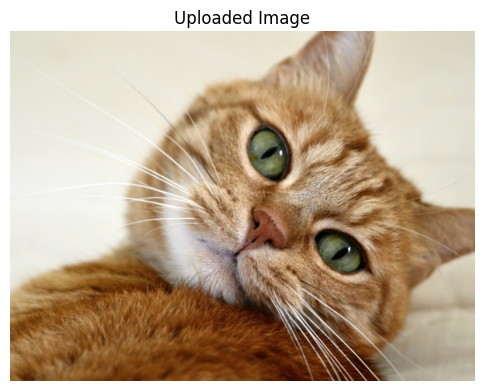

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Prediction Results:
Class: cat
Confidence Score: 100.00%


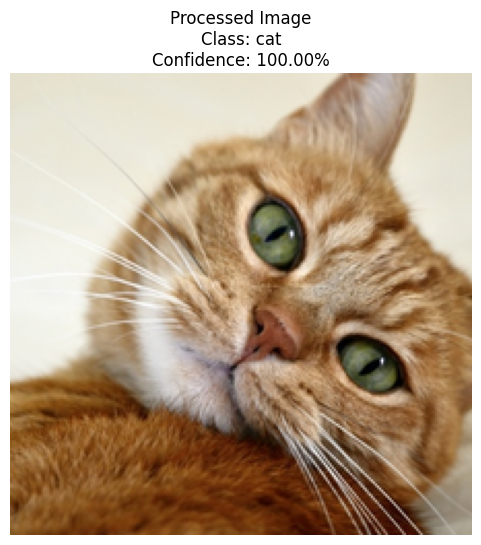

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import DepthwiseConv2D
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt  # For displaying images

# Custom layer to handle 'groups' parameter
class FixedDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        # Remove 'groups' argument if present
        kwargs.pop('groups', None)
        super().__init__(*args, **kwargs)

# Disable scientific notation
np.set_printoptions(suppress=True)

# Load model with custom layer
model = load_model("keras_model.h5",
                   compile=False,
                   custom_objects={'DepthwiseConv2D': FixedDepthwiseConv2D})

# Load labels
class_names = open("labels.txt", "r").readlines()

# Upload image
print("Please upload an image file:")
uploaded = files.upload()
image_path = next(iter(uploaded))

# Open and display the uploaded image
image = Image.open(image_path).convert("RGB")

# Display the image before processing
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# Preprocess image
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Create input array
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data[0] = normalized_image_array

# Run prediction
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print results
print("\nPrediction Results:")
print("Class:", class_name[2:], end="")
print("Confidence Score: {:.2%}".format(confidence_score))

# Display the processed image (optional)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f"Processed Image\nClass: {class_name[2:].strip()}\nConfidence: {confidence_score:.2%}")
plt.axis('off')
plt.show()

## 3. Projet 2 : Interaction avec un chatbot simple

### Qu'est-ce qu'un chatbot ? 💬
Un chatbot est un programme qui peut converser avec vous comme un ami. Il utilise l'IA pour comprendre ce que vous dites et répondre de manière appropriée.

### Interaction avec un chatbot pré-construit

1. **Installez ChatterBot** dans votre notebook Colab :
Les lignes de code ci-dessous préparent le terrain en rendant disponibles les classes nécessaires pour créer une instance de chatbot et l'entraîner à partir de données textuelles.

**Créez un chatbot** :

NB: le chatbot doit utiliser un vocabulaire de référence en français qu'il faut télécharger et installer dans le répertoire Google Colab à la racine (/content).

 https://raw.githubusercontent.com/gunthercox/chatterbot-corpus/refs/heads/master/chatterbot_corpus/data/french/conversations.yml

enregistrer le fichier brut `conversations.yml` localement sous `french.yml`

Télécharger ce fichier de votre répertoire local vers Google Colab.

Vous devez stocker ce fichier dans ce chemin:
 `/content/french.yml`


In [ ]:
!pip  install chatterbot

In [ ]:
import os
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer

# Create a ChatBot instance
chatbot = ChatBot('MyChatBot')

# Create a trainer and train the chatbot
trainer = ChatterBotCorpusTrainer(chatbot)

# Use the built-in corpus reference


trainer.train("/content/french.yml")  # Adjust the path to match where you uploaded the file

while True:
    try:
        user_input = input("Vous : ")
        if user_input.lower() == 'quit':
            break
        response = chatbot.get_response(user_input)
        print("Bot : ", response)
    except (KeyboardInterrupt, EOFError, SystemExit):
        break

ChatterBot Corpus Trainer: 1it [00:00, 10.41it/s]


Vous : bonjour ca va
Bot :  Je vais bien merci, et toi ?
Vous : qui es tu
Bot :  C'est la reponse a laquelle on essaie tous de repondre...
Vous : quel est ton livre préféré
Bot :  La classique H2G2, et en complet, l'ensemble de l atrilogie en 5 volumes.
Vous : tu travailles sur quel projet
Bot :  Sur quoi travailles-tu ?
Vous : toi, tu travailles sur quel projet
Bot :  Sur quoi travailles-tu ?


**Astuce** : Tapez "quit" pour arrêter la conversation.

### Comprendre comment le chatbot fonctionne
Le chatbot utilise des données d'entraînement pour apprendre à répondre aux questions. Plus il a de données, mieux il peut converser !

---

### Entraînement d'un chatbot
Ce code définit et entraîne un chatbot à l'aide de la bibliothèque ChatterBot en Python.

Nous allons accéder à un fichier de données pour entraîner un chatbot et permettant ainsi d'avoir des réponses plus spécifiques.

In [ ]:
# from chatterbot import ChatBot
# from chatterbot.trainers import ChatterBotCorpusTrainer, ListTrainer
# import os

# chatbot = ChatBot('MonChatBot')

# # First train with the built-in French corpus
# corpus_trainer = ChatterBotCorpusTrainer(chatbot)
# corpus_trainer.train('chatterbot.corpus.french')

# # Then train with your custom conversation
# custom_data_path = '/content/drive/MyDrive/Python-Sessions/Ressources/Chatbot/custom_french.yml'
# if os.path.exists(custom_data_path):
#     corpus_trainer.train(custom_data_path)

# # Test interaction
# print("Tapez 'quit' pour quitter.")
# while True:
#     try:
#         user_input = input("Vous : ")
#         if user_input.lower() == 'quit':
#             break
#         response = chatbot.get_response(user_input)
#         print("Bot :", response)
#     except (KeyboardInterrupt, EOFError, SystemExit):
#         break


In [ ]:
# Install required packages
!pip install chatterbot==1.0.8
!pip install chatterbot-corpus
!pip install spacy
!python -m spacy download fr_core_news_sm

ERROR: Ignored the following yanked versions: 1.1.0
ERROR: Ignored the following versions that require a different python version: 1.0.7 Requires-Python >=3.4, <=3.8; 1.0.8 Requires-Python >=3.4, <=3.8
ERROR: Could not find a version that satisfies the requirement chatterbot==1.0.8 (from versions: 0.0.0, 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.1.0, 0.1.1, 0.1.2, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.2.4, 0.2.5, 0.2.6, 0.2.7, 0.2.8, 0.2.9, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.5, 0.3.6, 0.3.7, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.4.10, 0.4.11, 0.4.12, 0.4.13, 0.5.0, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.5.5, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.8.0, 0.8.1, 0.8.2, 0.8.3, 0.8.4, 0.8.5, 0.8.6, 0.8.7, 1.0.0a1, 1.0.0a2, 1.0.0a3, 1.0.0a4, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0a7, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.2.6, 1.2.7)
ERROR: No matching distribution found for chatterbot==1.0.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer, ListTrainer
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Initialize chatbot
chatbot = ChatBot(
    'MonChatBot',
    storage_adapter='chatterbot.storage.SQLStorageAdapter',
    database_uri='sqlite:///database.sqlite3'
)

# Train with built-in French corpus
try:
    corpus_trainer = ChatterBotCorpusTrainer(chatbot)
    corpus_trainer.train('chatterbot.corpus.french')
    print("Training with French corpus completed.")
except Exception as e:
    print(f"Error training with corpus: {e}")

# Train with custom YAML file
custom_data_path = '/content/drive/MyDrive/Python-Sessions/Ressources/Chatbot/custom_french.yml'
if os.path.exists(custom_data_path):
    try:
        corpus_trainer.train(custom_data_path)
        print("Training with custom YAML completed.")
    except Exception as e:
        print(f"Error training with custom YAML: {e}")
else:
    print(f"Custom data file not found at {custom_data_path}")

# Train with a fallback custom conversation list
list_trainer = ListTrainer(chatbot)
custom_conversation = [
    "Bonjour, comment vas-tu ?", "Je vais bien, merci ! Et toi ?",
    "Quel temps fait-il aujourd'hui ?", "Il fait beau, profite du soleil !",
    "Que fais-tu ?", "Je suis ici à discuter avec des humains sympas comme toi !"
]
try:
    list_trainer.train(custom_conversation)
    print("Training with custom conversation list completed.")
except Exception as e:
    print(f"Error training with custom list: {e}")

# Interactive loop
print("Tapez 'quit' pour quitter.")
while True:
    try:
        user_input = input("Vous : ")
        if user_input.lower() == 'quit':
            break
        response = chatbot.get_response(user_input)
        print(f"Bot : {response}")
    except (KeyboardInterrupt, EOFError, SystemExit):
        print("Exiting chatbot...")
        break
    except Exception as e:
        print(f"Error during interaction: {e}")

# Save the trained model (optional)
from google.colab import files
files.download('database.sqlite3')
print("Chatbot session ended.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ChatterBot Corpus Trainer: 5it [00:01,  4.98it/s]


Training with French corpus completed.


ChatterBot Corpus Trainer: 1it [00:00,  1.61it/s]


Training with custom YAML completed.


List Trainer: 6it [00:00, 524.18it/s]


Training with custom conversation list completed.
Tapez 'quit' pour quitter.
Vous : bonjour comment vas tu
Bot : Je vais bien merci, et toi ?
Vous : quel temps fait il aujourd'hui
Bot : Il fait beau, profite du soleil !
Vous : quitter
Bot : Ca va
Vous : quit


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chatbot session ended.


 ## 3. Projet 3 : Interaction avec un chatbot d'OpenAI - Thème Harry Potter

In [2]:
# Importer les bibliothèques pour faire marcher notre super chatbot magique !
from google.colab import userdata
import openai
import textwrap  # Ajouté pour gérer le retour à la ligne automatiquement

# Récupérer la clé magique (API key) depuis les Secrets de Colab
api_key = userdata.get('OPENAI_API_KEY')

# Créer le client OpenAI pour parler à notre assistant magique
client = openai.OpenAI(api_key=api_key)

# Fonction pour discuter avec le chatbot (comme un hibou magique qui répond !)
def discuter_avec_chatbot():
    # Message de bienvenue fun
    print("✨ Bienvenue dans le Chatbot Magique de Poudlard ! ✨")
    print("Je suis ton assistant magique, prêt à répondre à toutes tes questions ! 🪄")
    print("Tape 'quitter' quand tu veux arrêter la magie. Allons-y !")

    while True:
        # Demander à l'enfant de poser une question
        print("\n📜 Écris ta question ou ton message :")
        message = input("Toi : ")

        # Si l'enfant tape 'quitter', on arrête le sortilège
        if message.lower() == 'quitter':
            print("🧙‍♂️ Au revoir, jeune sorcier ! Que la magie t'accompagne !")
            break

        # ce bloc  try ... except gére les erreurs potentielles de l'API avec élégance, en gardant le thème magique intact.
        try:
            # Lancer un sort pour envoyer le message à l'API OpenAI
            reponse = client.chat.completions.create(
                model="gpt-3.5-turbo",  # Le cerveau magique du chatbot
                messages=[
                    {"role": "system", "content": "Tu es un assistant magique, gentil et amusant, qui parle comme un professeur de Poudlard. Réponds de manière simple et fun pour des enfants de 10 à 15 ans, avec des emojis et un ton joyeux !"},
                    {"role": "user", "content": message}
                ]
            )

            # Afficher la réponse du chatbot avec un peu de magie
            chatbot_response = reponse.choices[0].message.content
            # Envelopper la réponse pour éviter le défilement horizontal (largeur de 80 caractères)
            wrapped_response = '\n'.join(textwrap.wrap(chatbot_response, width=80))
            print("\n🦇 Chatbot Magique :\n" + wrapped_response)

        except Exception as e:
            # Si quelque chose ne marche pas, on reste dans l'ambiance
            print("🧙‍♀️ Oups, mon sortilège a raté ! 😅 Réessaie. Erreur :", str(e))

# Lancer le sort pour démarrer le chatbot
discuter_avec_chatbot()

✨ Bienvenue dans le Chatbot Magique de Poudlard ! ✨
Je suis ton assistant magique, prêt à répondre à toutes tes questions ! 🪄
Tape 'quitter' quand tu veux arrêter la magie. Allons-y !

📜 Écris ta question ou ton message :
Toi : quels sont les plus puissants sortilèges

🦇 Chatbot Magique :
Ah, cher élève, les plus puissants sortilèges sont ceux qui demandent une grande
maîtrise de la magie ! 🧙‍♂️ Parmi eux, on peut citer le sortilège de l'Expecto
Patronum pour conjurer un Patronus protecteur, le sortilège de l'Impedimenta
pour ralentir les adversaires, ou encore le sortilège du Bouclier qui crée une
barrière de protection. N'oublie pas, la puissance d'un sortilège dépend de ta
concentration et de ta maîtrise de la baguette ! ✨🔮

📜 Écris ta question ou ton message :
Toi : qui a peur de qui

🦇 Chatbot Magique :
Oh, les créatures magiques ont parfois peur des sorciers, et les moldus peuvent
avoir peur des sorciers aussi ! Mais tu sais, il est important de ne pas avoir
peur de ce que l'on n

## Projet 4 : Interaction avec un chaptbot de Google Gemini
**Obtention de l'api GEMINI**
- Allez sur [Google AI Studio](https://aistudio.google.com/app/prompts/new_chat)
- Connectez-vous avec votre compte Google.
- Dans le menu de gauche, cliquez sur "Get API key".
- Cliquez sur "Create API key in new project" ou "Create API key in existing project" si vous avez déjà un projet.
- Votre nouvelle clé API sera générée et affichée.
- Copiez cette clé immédiatement, car vous ne pourrez pas la voir à nouveau pour des raisons de sécurité.
- Une fois que vous avez votre clé API, vous devez l'ajouter à Colab Secrets pour l'utiliser en toute sécurité dans votre notebook :

**Dans Google Colab**,
- cliquez sur l'icône "🔑" (Secrets) dans la barre latérale gauche.
- Cliquez sur "New secret".
- Pour le champ "Name", entrez GEMINI_API_KEY.
- Pour le champ "Value", collez la clé API que vous venez de copier depuis Google AI Studio.
- Assurez-vous que l'option "Notebook access" est activée pour ce secret (elle devrait l'être par défaut pour le notebook actuel).
- Après avoir ajouté la clé API aux secrets, vous pourrez exécuter la cellule de code qui utilise userdata.get('GEMINI_API_KEY') pour récupérer la clé et configurer l'API Gemini.

## 4. Projet 5 : Calculatrice Magique

**Activité : Construire une calculatrice amusante**

On va créer une calculatrice magique qui fait des calculs avec un style de magicien !

Crée une nouvelle cellule de code et tape :



```
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

def multiply(x, y):
    return x * y

def divide(x, y):
    return x / y

print("Bienvenue dans la Calculatrice Magique ! ✨")
operation = input("Choisis une opération : additionner, soustraire, multiplier, diviser : ")
num1 = float(input("Entre le premier nombre : "))
num2 = float(input("Entre le deuxième nombre : "))

if operation == "additionner":
    print(f"Abracadabra ! Le résultat est : {add(num1, num2)}")
elif operation == "soustraire":
    print(f"Abracadabra ! Le résultat est : {subtract(num1, num2)}")
elif operation == "multiplier":
    print(f"Abracadabra ! Le résultat est : {multiply(num1, num2)}")
elif operation == "diviser":
    print(f"Abracadabra ! Le résultat est : {divide(num1, num2)}")
else:
    print("Oups ! Cette opération n’existe pas dans mon grimoire magique.")
```

**Instructions** :

Teste la calculatrice avec différentes opérations et nombres.

> Défi : Ajoute deux nouvelles opérations :

**Puissance** : `def power(x, y): return x ** y` (par exemple, 2 à la puissance 3 = 8)


**Modulo** : `def modulo(x, y): return x % y` (par exemple, 10 % 3 = 1)


Modifie le code pour inclure ces options dans le menu (ajoute “puissance” et “modulo” dans les choix).

> **Astuce** : Rends ta calculatrice encore plus magique en changeant les messages, comme “Tadaa ! Voici ton résultat :” !


# 5. Discussion : L’IA dans la Vraie Vie

Pense à ces questions :

**Comment l’IA choisit-elle ?** Elle utilise des modèles mathématiques pour trouver des motifs dans les données. Par exemple, ton classificateur d’images a appris à reconnaître les formes des chats et des chiens.

**Quelles données faut-il pour l’IA ?** Beaucoup d’exemples ! Pour reconnaître des chats, il faut des milliers d’images étiquetées “chat”.

**Où voit-on l’IA ?** Dans les recommandations Netflix, les assistants comme Siri, avec les grand modèles de langage comme ChatGPT, Gemini, Mistral ... ou même les voitures autonomes !

**Activité** : Note une idée d’IA que tu voudrais créer (par exemple, un robot qui trie tes jouets) et partage-la avec ton prof !

---

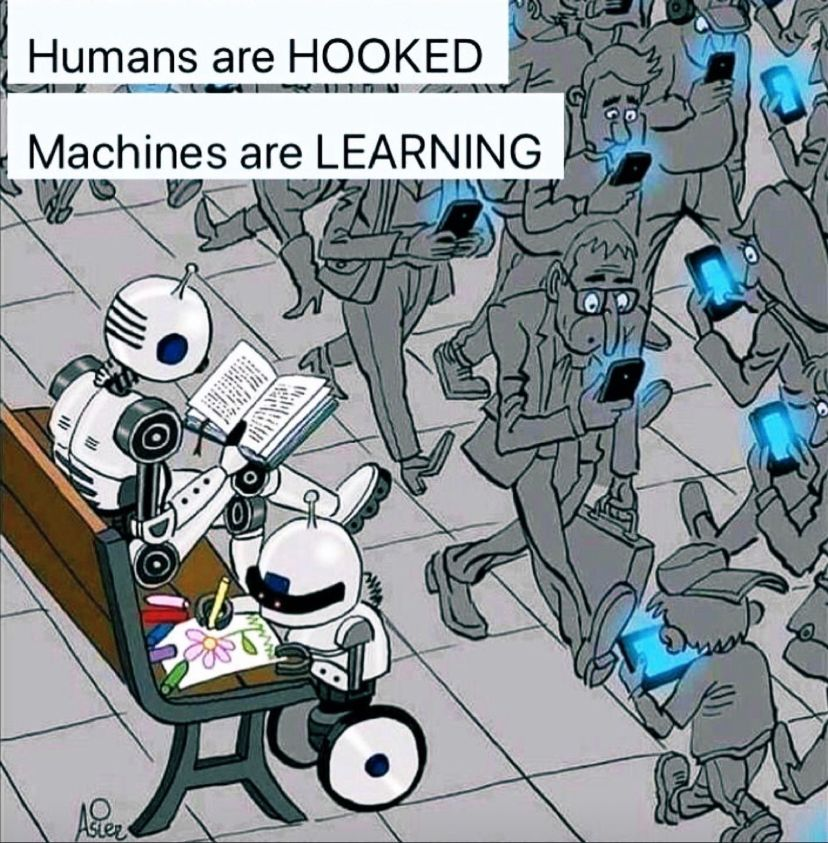

## Point spécifique sur l'apprentissage d'un grand modèle de langage

En anglais : Large Language Model (LLM)

Imaginez que vous souhaitiez apprendre à un enfant à lire et à comprendre des histoires. Vous lui donneriez des tonnes de livres, et il commencerait à remarquer des schémas dans les mots, les phrases et la façon dont les idées se connectent.

L'entraînement d'un grand modèle de langage est similaire, mais à grande échelle.

- **Collecter des montagnes de texte**: La première étape consiste à collecter d'énormes quantités de données textuelles sur Internet : livres, articles, sites web, conversations, etc. C'est comme donner au modèle une immense bibliothèque de connaissances et de communications humaines.

- **Le modèle apprend à prédire**: L'idée principale est d'entraîner le modèle à prédire le mot suivant dans une phrase, en se basant sur les mots qui le précèdent. Par exemple, si vous lui donnez « Le chat était assis sur le… », le modèle apprend que des mots comme « tapis », « moquette » ou « chaise » sont susceptibles de suivre.

- **Réseaux de neurones - Le «cerveau» du modèle**: Ces modèles utilisent des structures mathématiques très complexes appelées réseaux de neurones, inspirées du cerveau humain. Ces réseaux possèdent des milliards de connexions (comme des synapses cérébrales) qui s'ajustent au fur et à mesure de l'apprentissage du modèle.

- **Apprendre de ses erreurs**: Le modèle fait des prédictions et les compare au mot suivant dans les données d'entraînement. En cas d'erreur, le réseau ajuste ses connexions internes pour faire de meilleures prédictions la fois suivante. Ce processus est répété à l'infini avec de grandes quantités de données.

- **Devenir plus sophistiqué**: À mesure que le modèle améliore sa prédiction du mot suivant, il commence à apprendre des schémas plus profonds :
Grammaire et syntaxe : Comment les mots s'assemblent pour former des phrases correctes.

- **Faits et connaissance**: Informations sur le monde intégré au texte.
Différents styles : Comment les gens écrivent ou parlent dans différents contextes.

- **Raisonnement et logique**: Comment les idées se connectent et se suivent.

- **Affinement**: Après cet entraînement initial intensif, le modèle est souvent « affiné » sur des tâches ou des ensembles de données plus spécifiques afin de l'améliorer, par exemple pour répondre à des questions, rédiger différents types de textes ou suivre des instructions.


Ainsi, les grands modèles de langage apprennent en lisant et en prédisant, construisant progressivement une compréhension complexe du langage et du monde qu'il décrit. C'est comme leur donner une capacité surpuissante : comprendre et générer du texte de type humain !

# Ce qu’on a appris
Aujourd'hui, nous avons appris :

- Comment utiliser Teachable Machine pour créer un classificateur d'images.
- Comment interagir avec un chatbot en utilisant Python.
- Comment l'IA fonctionne et quelles données elle utilise.
- Nous avons aussi vu comme les grands modèles de langage comme ceux de OpenAI ou Gemini sont entraînés.


# La Prochaine Fois

Dans la prochaine session, on va continuer à explorer l’IA et créer des projets encore plus cool ! Continue à t’entraîner en modifiant le code et en testant de nouvelles idées. 🌟

> Astuce : Si tu vois une erreur dans Colab, lis le message pour comprendre ce qui ne va pas, puis corrige et réessaie !

> Aussi, 🤖 Demande à l'IA : aide toi de l'IA pour résoudre ton erreur ou développer du code